# 21M.387 Fundamentals of Music Processing
## Lab8

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *
import fmp
import itertools

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 4)

## Exercise 1

- Find a song or two on your computer.
- Use Audacity to convert these songs to 22,050k, mono, wav files.
- Make the filename descriptive, like `<artists>_<songname>.wav`
- Upload to this [Google Drive Folder](https://drive.google.com/open?id=0B2elrq8YD1jxVjJ4UE1zSkU0Ylk)


## Exercise 2a

A bit about using python dictionaries (which comes in handy when making inverted lists):

`fav_nums` is a dictionary of people and a list of their favorite numbers

In [12]:
fav_nums = {"alice": (1,2,42), "bob":(7, 17, 42), "claire":(99,101), "dan":(5,15)}

Write a `for` loop that prints a person and the list of their favorite numbers

In [14]:
for k in fav_nums:
    print k, fav_nums[k]

claire (99, 101)
bob (7, 17, 42)
dan (5, 15)
alice (1, 2, 42)


## Exercise 2b

Write the function `hash_of_name(name)` that coverts a name to a number:
- Sum all the ascii values of the characters in the name
- You can use the function `ord` for that
- Take the modulo 10 of that number

Print the hash values for each name above.

In [6]:
def hash_of_name(name):
    return sum(map(ord,name))%10

for k in fav_nums:
    print k, hash_of_name(k)


claire 4
bob 7
dan 7
alice 0


## Exercise 3

Finally, write code that populates a new dictionary `hash_list` such that:
- the keys are the hash values of the name
- the values of each key is an accumulated list of the favorite numbers corresponding to the hash of the name.

In [40]:

hash_list = {}
for name in fav_nums:
    hash_name = hash_of_name(name)
    if hash_name not in hash_list:
        hash_list[hash_name] = fav_nums[name]
    else:
        hash_list[hash_name] += fav_nums[name]
print hash_list

import itertools as it
import operator as op

hash_list_2 = {k:reduce(op.add, map(lambda x:fav_nums[x],g))
                 for k,g in it.groupby(fav_nums,key=hash_of_name)}
print hash_list_2
        



{0: (1, 2, 42), 4: (99, 101), 7: (7, 17, 42, 5, 15)}
{0: (1, 2, 42), 4: (99, 101), 7: (7, 17, 42, 5, 15)}


## Exercise 4a

Load the image below.  
Images come into `numpy` as 3D matrices $(W \times H \times 3)$ where the 3rd dimension has the values for R, G, B.

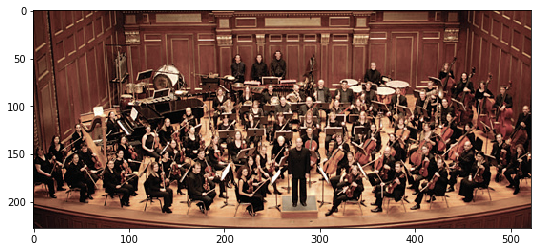

In [41]:
# load image, convert to grayscale
import matplotlib.image
img_clr = matplotlib.image.imread("data/bmop.png")
plt.imshow(img_clr);

Create a 2D greyscale matrix by averaging R, G, B into one value (using `np.mean`).

(228, 522, 3)


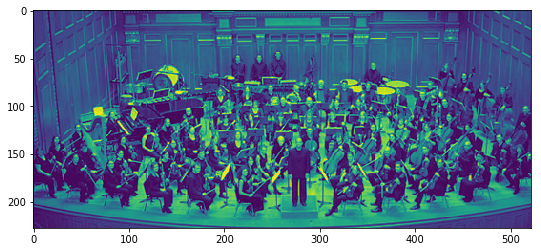

In [43]:
print img_clr[:,:,0:3].shape
grey_scale = np.mean(img_clr[:,:,0:3],axis=2)
plt.imshow(img)

## Exercise 4b

For this image (matrix $\mathbf{X}$), we will find the points of local maxima.

- First, apply function `maximum_filter` from `scipy.ndimage.filters` to form $\mathbf{X}_{\text{max}}$.  
- You need to specify a local zone size of (height,width) for this filter. Use `(20,40)`.  
- Plot $\mathbf{X}_{\text{max}}$.  

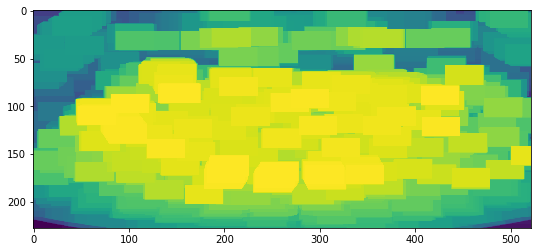

In [44]:
from scipy.ndimage.filters import maximum_filter

img_max = maximum_filter(grey_scale,size=(20,40))
plt.imshow(img_max)

## Exercise 4c

A point $(x,y)$ is a local maximum (a peak) if $\mathbf{X}(x,y) = \mathbf{X}_{\text{max}}(x,y)$.  
- Find all the peaks in the image as $(x,y)$ coordinates.  
- Format these points as a $P \times 2$ matrix representing $P$ points where each row is the $(x,y)$ coordinates of that point.
- The function `np.where` is useful here. It returns the indexes of non-zero values of a Boolean array.
- Plot the image and the points on top as red dots.

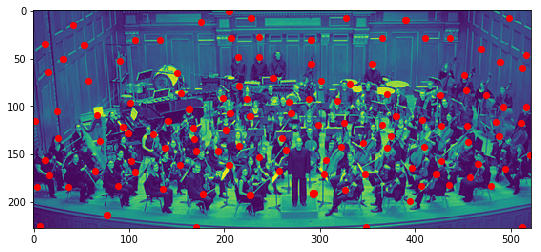

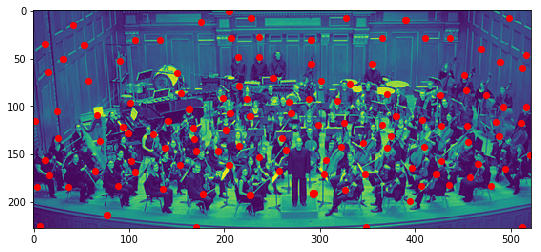

In [71]:
y,x = np.where(img_max == grey_scale)
peaks1 = np.array([x,y]).T

peaks2 = (np.array(np.where(img_max==img)).T)[:,::-1]
plt.imshow(img)
plt.plot(peaks1[:,0], peaks1[:,1],'ro')

plt.figure()
plt.imshow(img)
plt.plot(peaks2[:,0], peaks2[:,1], 'ro')

How many points where generated?

In [73]:
print peaks1.shape[0]
print peaks2.shape[0]

125
125


## Exercise 5

Write the function `find_top_n_peaks(x, n, win_hlen)` to find the top N highest peaks of a 1D signal.

Inputs:
- `x`: the signal
- `n`: the number of peaks to return
- `win_hlen`: the half-length of a range centered around a found peak that should be removed from consideration when locating the next peak.

Outputs:
- a list of index values corresponding to peaks of $x$.

Strategy:
- Find the maximum value
- Modify the signal to squash out a region around that peak value
- Repeat

In [80]:
#1D signal
def find_top_n_peaks(x, n, win_hlen):
    peak_indices = []
    for _ in range(n):
        peak_index = np.argmax(x)
        peak_indices.append(peak_index)
        x[peak_index - win_hlen: peak_index + win_hlen] = 0
    return peak_indices



- Test the function with the data below.  
- Look for the top 4 peaks.  
- Try various values of `win_hlen` to get a feel for how it works.

In [81]:
sig = np.load("data/lab_5.npy")
find_top_n_peaks(sig, 4, 5)



[455, 78, 72, 83]

## Exercise 6

We will now create a Fingerprint database with all these songs.

First, copy all the songs from the [Google Drive Folder](https://drive.google.com/open?id=0B2elrq8YD1jxVjJ4UE1zSkU0Ylk) to your local drive.

In [82]:


FILES_DIR = "audio"

files = get_directory_files(FILES_DIR, '.wav')
fp_db = fmp.FingerprintDB()
for f in files:
    fp_db.add(f)

adding audio/superstition_eq.wav
adding audio/beethoven_5_1_morton.wav
adding audio/superstition_reverb.wav
adding audio/beeth5_query.wav
adding audio/mozart_query.wav
adding audio/superstition_noise.wav
adding audio/beethoven_5_1_bernstein.wav
adding audio/beatles_magical_mystery_tour.wav
adding audio/beethoven_5_1_dudamel.wav
adding audio/superstition_orig.wav
adding audio/brahms_hungarian_5.wav
adding audio/polytonal_linkin_park.wav
adding audio/beeth5_query2.wav
adding audio/mozart_eine_kleine1.wav


Now, we'll create some queries

In [84]:
query = load_wav("./audio/polytonal_linkin_park.wav")
fp_db.query(query)

([('audio/polytonal_linkin_park.wav', 0.0, 2321)], 2321)

## Exercise 7
With the same set of files, we will run the Audio Matching algorithm:

In [85]:
match_db = fmp.MatchDB()
for f in files:
    match_db.add(f)

adding audio/superstition_eq.wav
adding audio/beethoven_5_1_morton.wav
adding audio/superstition_reverb.wav
adding audio/beeth5_query.wav
adding audio/mozart_query.wav
adding audio/superstition_noise.wav
adding audio/beethoven_5_1_bernstein.wav
adding audio/beatles_magical_mystery_tour.wav
adding audio/beethoven_5_1_dudamel.wav
adding audio/superstition_orig.wav
adding audio/brahms_hungarian_5.wav
adding audio/polytonal_linkin_park.wav
adding audio/beeth5_query2.wav
adding audio/mozart_eine_kleine1.wav
